# **ETL for cars.com**

# **Group project (30%)**


Group 1
* SHAHRIZAL IBRAHIM BIN JAMALUDIN (A193043)
* NUR HUSNINA BINTI FAIZAL (A188456)
* AMIRA SYAFIKA BINTI ABD RAHIM (A187237)
* NUR AMIRA FARISHA BINTI MOHD YUSRI (A186976)



## **Installation and Library Imports**

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.4 MB/s eta 0:00:00


In [ ]:
import requests
import contractions
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import csv

## **Scrape Data From www.cars.com**

In [ ]:
def extract_review_info(review_soup):
    byline_element = review_soup.find('div', class_='review-byline').find('div', class_='review-type')
    usernameloc = byline_element.find_previous('div').text.strip().split(" from ")
    username = usernameloc[0].strip()
    location = usernameloc[1].strip() if len(usernameloc) > 1 else ""

    headline_element = review_soup.find('h3', class_='spark-heading-7 title')
    headline = headline_element.text.strip()

    review = byline_element.find_next('div').text.strip()
    review_type = byline_element.find('strong').text.strip()

    date_element = review_soup.find('div', class_='review-byline').find('div')
    date = date_element.text.strip()

    rating_element = review_soup.find('div', class_='sds-rating')
    rating_count = rating_element.find('span', class_='sds-rating__count').text.strip()

    recommend_element = review_soup.find('ul', class_='sds-list--unordered').find_all('li')[-1]
    recommend_status = recommend_element.text.strip()

    return {
        'username': username,
        'headline': headline,
        'review': review,
        'location': location,
        'review_type': review_type,
        'date': date,
        'rating_count': rating_count,
        'recommend_status': recommend_status,
    }

def extract_reviews(url):
    reviews = []

    # Iterate through pages (you may need to adjust the range based on the actual number of pages)
    for page in range(1, 3):  # Adjust the range based on the actual number of pages
        page_url = f"{url}&page={page}"

        # Send an HTTP GET request to the URL
        response = requests.get(page_url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content
            soup = BeautifulSoup(response.text, 'html.parser')

            # Extract review elements
            review_elements = soup.find_all('div', class_='sds-container consumer-review-container')

            # Extract information from each review
            for review_element in review_elements:
                review_info = extract_review_info(review_element)
                reviews.append(review_info)
        else:
            print(f"Failed to retrieve content for page {page}. Status Code: {response.status_code}")

    return reviews

# Example usage:
url = "https://www.cars.com/research/ford-mustang-2010/consumer-reviews/?bodystyle=coupe&cpo_indicator=false&customer_id=5379406&listing_id=5ff6786f-1d8b-4360-9535-223598065a23&make=ford&model=mustang&model_year=2010&msrp=&page_size=200&price=7990&seller_id=&stock_type=used&trim=v6"

all_reviews = extract_reviews(url)

# Display information for each review
for idx, review_info in enumerate(all_reviews, start=1):
    print(f"\nReview {idx}:")
    print(f"Username: {review_info['username']}")
    print(f"Headline: {review_info['headline']}")
    print(f"Review: {review_info['review']}")
    print(f"Location: {review_info['location']}")
    print(f"Review Type: {review_info['review_type']}")
    print(f"Date: {review_info['date']}")
    print(f"Rating Count: {review_info['rating_count']}")
    print(f"Recommend Status: {review_info['recommend_status']}")



Review 1:
Username: By Wolfman52
Headline: I'm not too old for my car
Review: My first car was a 67 mustang fastback. I loved this car and I was 18 and in the military. I'm now 70 and found a 2010 mustang bright red. I was in love all over again! Now driving this car I feel nostalgia all over again!!
Location: Fredericksburg VA
Review Type: Owns this car
Date: May 29, 2022
Rating Count: 5.0
Recommend Status: Does recommend this car

Review 2:
Username: By Toretto's Garage
Headline: The fastest car that I've owned
Review: Five hundred fifty horses of pure Detroit muscle.  So much torque that the chassis twisted coming off the line.  I can barely keep the car on the track.
Location: NJ
Review Type: Owns this car
Date: February  9, 2021
Rating Count: 5.0
Recommend Status: Does recommend this car

Review 3:
Username: By jake
Headline: Best First car
Review: As my first car it was a truly great experience. Any one that loves a sporty look with a blackout finish will enjoy this car.
Locatio

# **Data Visualization (Before Cleaning)**

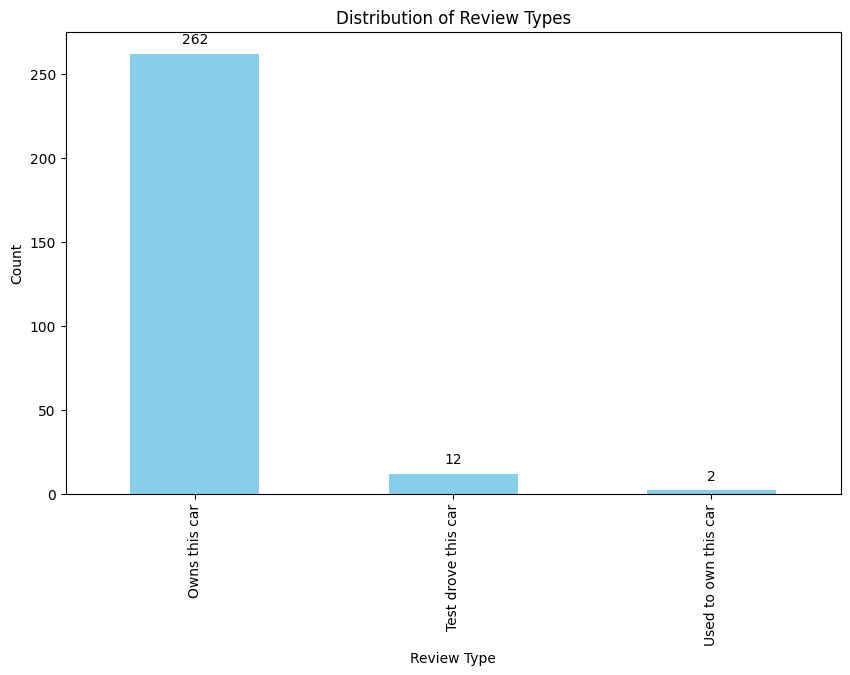

In [ ]:
# Create a DataFrame
df = pd.DataFrame(all_reviews)

# Bar Chart for Review Types
plt.figure(figsize=(10, 6))
ax = df['review_type'].value_counts().plot(kind='bar', color='skyblue')

# Add annotations to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Review Types')
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.show()

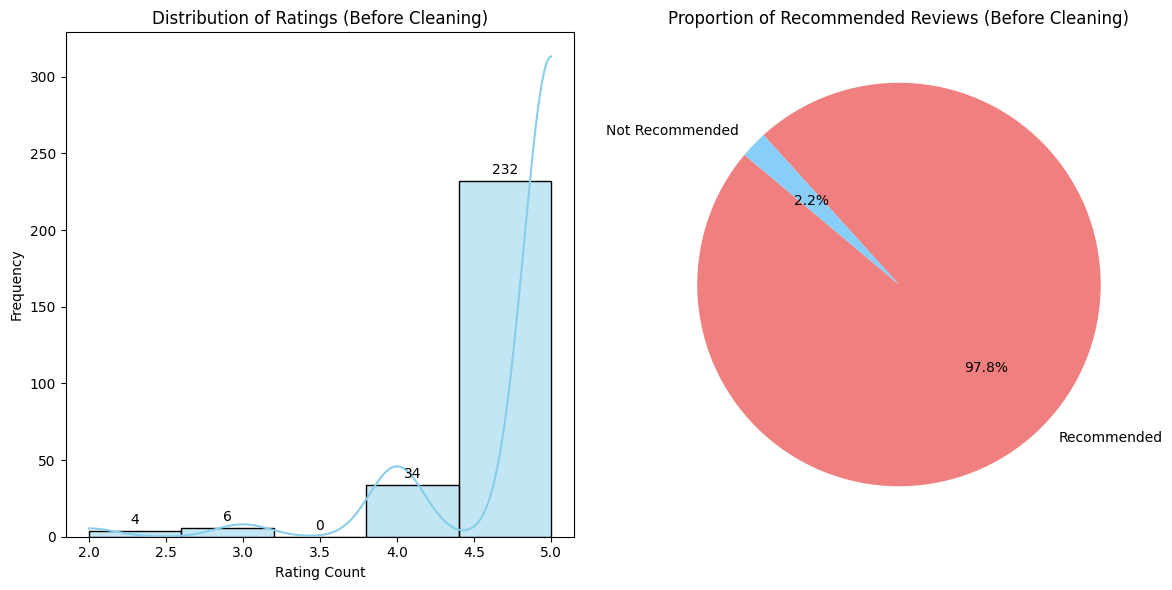

In [ ]:
# Function to map recommendation status based on the text
def map_recommend_status(recommend_status_str):
    recommend_status_lower = recommend_status_str.lower()
    if "does recommend" in recommend_status_lower:
        return 1
    elif "does not recommend" in recommend_status_lower:
        return 0
    else:
        return "N/A"

# Extract relevant data for visualization
ratings_before_cleaning = [float(review['rating_count']) for review in all_reviews if review['rating_count'] != 'N/A']
recommendation_counts_before_cleaning = [map_recommend_status(review['recommend_status']) for review in all_reviews]

# Plotting
plt.figure(figsize=(12, 6))

# Distribution of Ratings
plt.subplot(1, 2, 1)
ax = sns.histplot(ratings_before_cleaning, bins=5, kde=True, color='skyblue')
plt.title('Distribution of Ratings (Before Cleaning)')
plt.xlabel('Rating Count')
plt.ylabel('Frequency')

# Add values on each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie Chart for Recommendation Status
plt.subplot(1, 2, 2)
labels = ['Recommended', 'Not Recommended']
sizes = [np.sum(recommendation_counts_before_cleaning), len(recommendation_counts_before_cleaning) - np.sum(recommendation_counts_before_cleaning)]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Recommended Reviews (Before Cleaning)')

plt.tight_layout()
plt.show()

# **Data Cleaning**

In [ ]:
# Function to expand contractions in a text
def expand_contractions(text):
    return contractions.fix(text)

def map_review_type(review_type_str):
    review_type_lower = review_type_str.lower()
    if "test drove this car" in review_type_lower:
        return 0
    elif "used to own this car" in review_type_lower:
        return 1
    elif "owns this car" in review_type_lower:
        return 2
    else:
        return "N/A"

def extract_review_info(review_soup):
    byline_element = review_soup.find('div', class_='review-byline').find('div', class_='review-type')
    usernameloc = byline_element.find_previous('div').text.strip().split(" from ")

    # Remove "By" from the username and replace it with the word after it
    username = usernameloc[0].replace("By", "").strip().lower() if usernameloc else "N/A"

    location = usernameloc[1].strip().lower() if len(usernameloc) > 1 else "N/A"

    headline_element = review_soup.find('h3', class_='spark-heading-7 title')
    headline = headline_element.text.strip().lower() if headline_element else "N/A"

    review = byline_element.find_next('div').text.strip().lower() if byline_element.find_next('div') else "N/A"
    review_type = byline_element.find('strong').text.strip().lower() if byline_element.find('strong') else "N/A"

    date_element = review_soup.find('div', class_='review-byline').find('div')
    date_str = date_element.text.strip().lower() if date_element else "N/A"

    # Transform date to YYYY-MM-DD format
    try:
        date = datetime.strptime(date_str, "%B %d, %Y").strftime("%Y-%m-%d")
    except ValueError:
        date = "N/A"

    rating_element = review_soup.find('div', class_='sds-rating')
    rating_count = rating_element.find('span', class_='sds-rating__count').text.strip().lower() if rating_element else "N/A"

    recommend_element = review_soup.find('ul', class_='sds-list--unordered').find_all('li')[-1]
    recommend_status_str = recommend_element.text.strip().lower() if recommend_element else "N/A"

    # Map recommend status to 0 or 1
    recommend_status = 1 if "does recommend this car" in recommend_status_str else 0

    # Map review type to 0, 1, or 2
    mapped_review_type = map_review_type(review_type)

    # Expand contractions in review text
    expanded_review = expand_contractions(review)

    return {
        'username': username,
        'headline': headline,
        'review': expanded_review,
        'location': location,
        'review_type': map_review_type(review_type),
        'date': date,
        'rating_count': rating_count,
        'recommend_status': recommend_status,
    }

def extract_reviews(url):
    reviews = []

    # Iterate through pages (you may need to adjust the range based on the actual number of pages)
    for page in range(1, 3):  # Adjust the range based on the actual number of pages
        page_url = f"{url}&page={page}"

        # Send an HTTP GET request to the URL
        response = requests.get(page_url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content
            soup = BeautifulSoup(response.text, 'html.parser')

            # Extract review elements
            review_elements = soup.find_all('div', class_='sds-container consumer-review-container')

            # Extract information from each review
            for review_element in review_elements:
                review_info = extract_review_info(review_element)
                reviews.append(review_info)
        else:
            print(f"Failed to retrieve content for page {page}. Status Code: {response.status_code}")

    return reviews

def remove_duplicates(reviews):
    seen_reviews = set()
    unique_reviews = []
    duplicate_count = 0

    for review in reviews:
        # Convert the review information to a tuple to use it as a set key
        review_key = tuple(review.items())

        # Check if this review is already seen
        if review_key not in seen_reviews:
            seen_reviews.add(review_key)
            unique_reviews.append(review)
        else:
            duplicate_count += 1

    return unique_reviews

# Example usage:
url = "https://www.cars.com/research/ford-mustang-2010/consumer-reviews/?bodystyle=coupe&cpo_indicator=false&customer_id=5379406&listing_id=5ff6786f-1d8b-4360-9535-223598065a23&make=ford&model=mustang&model_year=2010&msrp=&page_size=200&price=7990&seller_id=&stock_type=used&trim=v6"

all_reviews = extract_reviews(url)

# Remove duplicates
unique_reviews = remove_duplicates(all_reviews)

# Display information for each review after removing duplicates
print("\nAfter removing duplicates:")
for idx, review_info in enumerate(unique_reviews, start=1):
    print(f"\nReview {idx}:")
    print(f"Username: {review_info['username']}")
    print(f"Headline: {review_info['headline']}")
    print(f"Review: {review_info['review']}")
    print(f"Location: {review_info['location']}")
    print(f"Review Type: {review_info['review_type']}")
    print(f"Date: {review_info['date']}")
    print(f"Rating Count: {review_info['rating_count']}")
    print(f"Recommend Status: {review_info['recommend_status']}")

# Print total number of reviews before removing duplicates
print(f"\nTotal number of reviews before removing duplicates: {len(all_reviews)}")

# Print total number of reviews after removing duplicates
print(f"\nTotal number of reviews after removing duplicates: {len(unique_reviews)}")



After removing duplicates:

Review 1:
Username: wolfman52
Headline: i'm not too old for my car
Review: my first car was a 67 mustang fastback. i loved this car and i was 18 and in the military. i am now 70 and found a 2010 mustang bright red. i was in love all over again! now driving this car i feel nostalgia all over again!!
Location: fredericksburg va
Review Type: 2
Date: 2022-05-29
Rating Count: 5.0
Recommend Status: 1

Review 2:
Username: toretto's garage
Headline: the fastest car that i've owned
Review: five hundred fifty horses of pure detroit muscle.  so much torque that the chassis twisted coming off the line.  i can barely keep the car on the track.
Location: nj
Review Type: 2
Date: 2021-02-09
Rating Count: 5.0
Recommend Status: 1

Review 3:
Username: jake
Headline: best first car
Review: as my first car it was a truly great experience. any one that loves a sporty look with a blackout finish will enjoy this car.
Location: statefarm
Review Type: 2
Date: 2020-12-22
Rating Count

## **Data Visualisation**

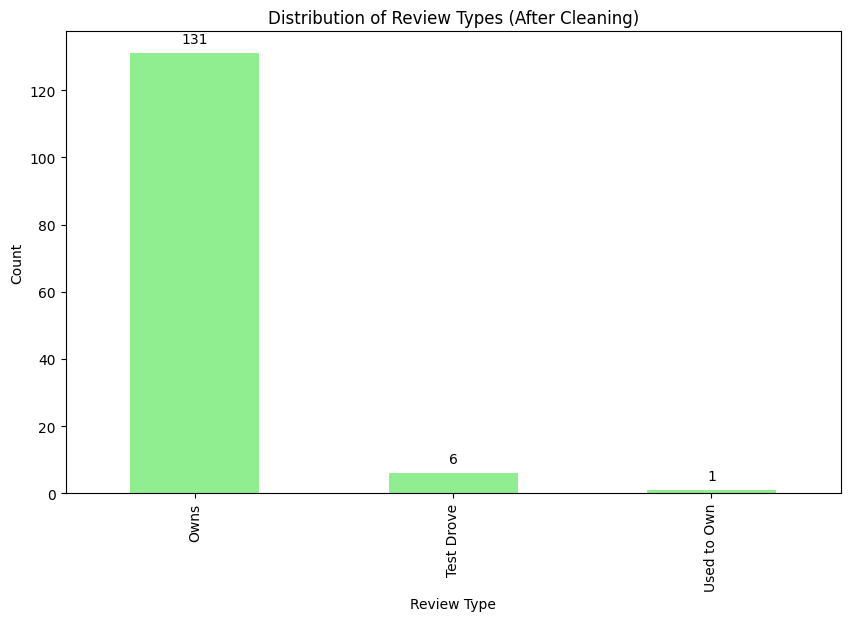

In [ ]:
# Mapping for Review Types
review_type_labels = {
    0: 'Test Drove',
    1: 'Used to Own',
    2: 'Owns'
}

# Create a DataFrame from the unique_reviews data after cleaning
df_cleaned = pd.DataFrame(unique_reviews)

# Map the review_type column to their respective labels
df_cleaned['review_type_label'] = df_cleaned['review_type'].map(review_type_labels)

# Bar Chart for Review Types after cleaning
plt.figure(figsize=(10, 6))
ax_cleaned = df_cleaned['review_type_label'].value_counts().sort_index().plot(kind='bar', color='lightgreen')

# Add annotations to each bar
for p in ax_cleaned.patches:
    ax_cleaned.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Review Types (After Cleaning)')
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.show()

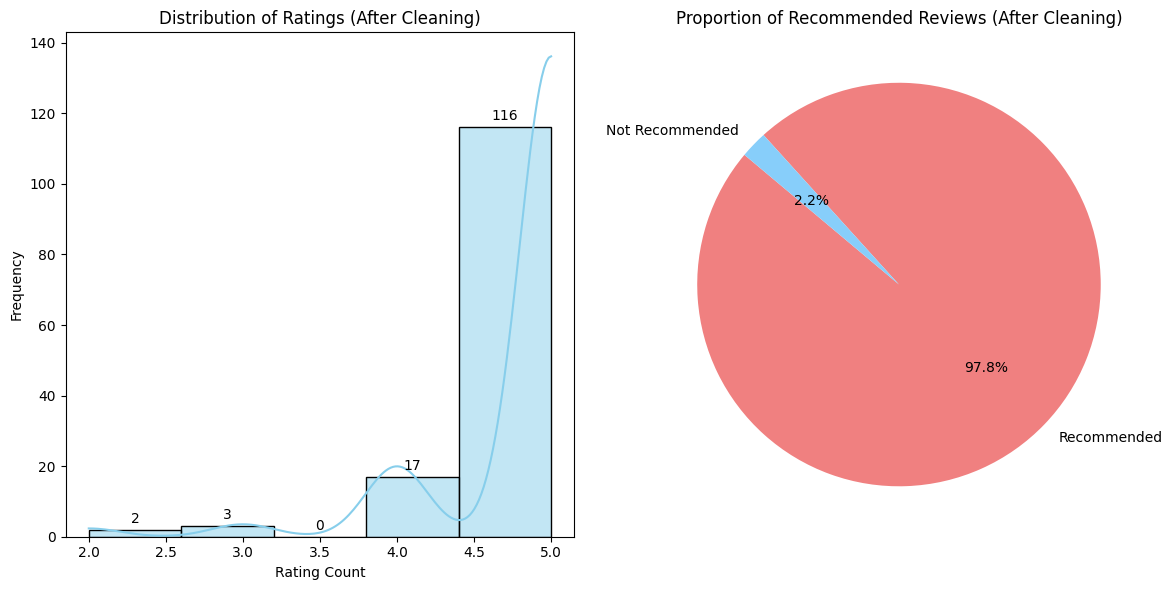

In [ ]:
# Function to map recommendation status based on the text
def map_recommend_status(recommend_status):
    if isinstance(recommend_status, str):
        # Extract the numeric value from the string
        try:
            return int(recommend_status.split()[-1])
        except (ValueError, IndexError):
            return np.nan
    elif isinstance(recommend_status, int):
        return recommend_status
    else:
        return np.nan

# Extract relevant data for visualization
ratings_after_cleaning = [float(review['rating_count']) for review in unique_reviews if review['rating_count'] != 'N/A']
recommendation_counts_after_cleaning = [map_recommend_status(review['recommend_status']) for review in unique_reviews]

# Plotting
plt.figure(figsize=(12, 6))

# Distribution of Ratings
plt.subplot(1, 2, 1)
ax = sns.histplot(ratings_after_cleaning, bins=5, kde=True, color='skyblue')
plt.title('Distribution of Ratings (After Cleaning)')
plt.xlabel('Rating Count')
plt.ylabel('Frequency')

# Add values on each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie Chart for Recommendation Status
plt.subplot(1, 2, 2)

# Handle NaN values in recommendation_counts_after_cleaning
filtered_recommendations = [count for count in recommendation_counts_after_cleaning if not np.isnan(count)]

# Check if there are any valid counts
if filtered_recommendations:
    sizes = [np.sum(filtered_recommendations), len(filtered_recommendations) - np.sum(filtered_recommendations)]
else:
    sizes = [0, 0]

labels = ['Recommended', 'Not Recommended']
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Recommended Reviews (After Cleaning)')

plt.tight_layout()
plt.show()

## **Save Clean Data to .csv**

In [ ]:
# Export the clean data to CSV
csv_file_path = "clean_reviews.csv"
fields = ['username', 'headline', 'review', 'location', 'review_type', 'date', 'rating_count', 'recommend_status']

with open(csv_file_path, mode='w', newline='', encoding='utf-8') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=fields)

    # Write the header
    writer.writeheader()

    # Write the data
    writer.writerows(unique_reviews)

# Print total number of reviews before removing duplicates
print(f"\nTotal number of reviews before removing duplicates: {len(all_reviews)}")

# Print total number of reviews after removing duplicates
print(f"\nTotal number of reviews after removing duplicates: {len(unique_reviews)}")

print(f"\nClean data exported to: {csv_file_path}")


Total number of reviews before removing duplicates: 276

Total number of reviews after removing duplicates: 138

Clean data exported to: clean_reviews.csv
